# 분석 보고서: 운동 빈도와 BMI 간의 관계 분석

## 1. 연구 목적
본 연구는 **하루 30분 이상 운동 빈도**와 **BMI(체질량지수)** 간의 관계를 탐구하기 위해 수행되었습니다. 연구의 주요 목적은 **운동 빈도에 따라 BMI가 유의미하게 달라지는지**를 분석하고, 그룹 간의 차이를 비교하는 것

---

## 2. 데이터 설명
- **데이터셋**: 2022년 학생 건강 검진 데이터
- **총 데이터 크기**: 53,038개의 유효 데이터(결측치 제거 후)
- **주요 변수**:
  - **하루30분이상운동**: 1(거의 안 함), 2(가끔 함), 3(자주 함), 4(매일 함)
  - **BMI**: 학생들의 체질량지수

---

## 3. 데이터 전처리
### (a) 결측치 처리
- `'BMI'`와 `'하루30분이상운동'` 열에서 결측치를 제거.
- 제거 후 총 **53,038개의 데이터**가 남음.

### (b) 중학교와 고등학교 데이터 분리
- **중학교**: 25,609개 데이터
- **고등학교**: 27,429개 데이터

---

## 4. 데이터 분석
### (a) 그룹별 BMI 평균
- 각 운동 빈도 그룹의 BMI 평균:
  - **운동 그룹 1**: 21.56
  - **운동 그룹 2**: 22.05
  - **운동 그룹 3**: 22.28
  - **운동 그룹 4**: 22.34
- **평균적으로 운동 빈도가 높을수록 BMI가 증가**하는 경향을 확인.

### (b) 시각화
#### 박스플롯:
- 전체 데이터, 중학교, 고등학교 데이터를 나누어 BMI의 분포를 시각화.
- **운동 빈도가 증가할수록 BMI 중앙값이 약간 증가**하는 경향을 관찰.

#### Q-Q Plot:
- BMI의 정규성을 시각적으로 확인.
- **모든 그룹에서 정규성을 따르지 않음**을 확인.

---

## 5. 가정 검정
### (a) 정규성 검정
- **Kolmogorov-Smirnov Test**:
  - 모든 그룹에서 p-value가 0.05 미만 → **정규성을 따르지 않음.**

### (b) 등분산성 검정
- **Levene’s Test**:
  - p-value = 0.0000 → **그룹 간 분산이 동일하지 않음(등분산성 가정 위반).**

---

## 6. 분석 방법
가정 검정 결과에 따라 **비모수 방법과 대체 검정**을 활용:

### (a) Kruskal-Wallis Test
- **비모수 검정**으로, 그룹 간 BMI 중앙값의 차이를 비교.
- \( H\text{-Statistic} = 398.99 \), p-value = 0.0000 → **유의미한 차이 있음.**

### (b) 사후 검정
- **Dunn’s Test** (Bonferroni 보정):
  - 그룹 1~2, 1~3, 1~4, 2~3, 2~4 간 유의미한 차이 확인.
  - **그룹 3과 4 간 유의미한 차이 없음.**
---

## 7. 결과 해석
### (a) 주요 결과
1. **운동 빈도와 BMI의 관계**:
   - 운동 빈도가 높아질수록 BMI가 증가하는 경향을 보임.
   - 이는 **운동량이 BMI를 증가시키는 원인이라기보다는 다른 요인**(예: 근육량 증가, 건강 상태 등)의 영향일 가능성이 있음.

2. **그룹 간 차이**:
   - 그룹 1(거의 안 함)과 그룹 4(매일 함)의 차이는 가장 크며, 평균적으로 약 **0.78의 BMI 차이**를 보임.
   - **그룹 3(자주 함)과 그룹 4(매일 함)** 간에는 유의미한 차이가 없음.

### (b) 이상치 분석
- **그룹별 BMI 이상치**:
  - 이상치는 그룹 1에서 가장 많이 발생(270개).
  - 이는 비정상적으로 높은 BMI 값을 가진 데이터 때문일 가능성 있음.

---

## 8. 결론 및 한계
### 결론
- 운동 빈도에 따라 BMI의 중앙값 및 평균값이 **유의미하게 다름.**
- 그룹 간 차이를 확인한 결과, **그룹 3과 4 간 차이는 유의미하지 않음.**

### 한계
1. **원인-결과 관계를 확정할 수 없음**:
   - 상관관계 분석에 불과하며, 운동 빈도와 BMI의 직접적인 인과 관계를 설명하지 못함.
2. **정규성 위반**:
   - 정규성을 만족하지 못한 데이터에 대해 비모수 검정을 사용했으나, 정규화 과정이 필요할 수 있음.

---



In [ ]:
pip install openpyxl

In [12]:
import pandas as pd

data = pd.read_csv('school_health_2022.csv', encoding='utf-8')

print(data.head()) 

    학년도      최종가중치   학교ID         도시규모   공학여부  시도 학교급  학년  반  순번  ...  \
0  2022   0.374440  482.0  1. 대도시/중소도시  1. 공학  세종   초   3  1   6  ...   
1  2022   0.278028  391.0  1. 대도시/중소도시  1. 공학  대전   초   4  2  14  ...   
2  2022  15.931520  523.0       2. 읍지역  1. 공학  경기   초   1  1   1  ...   
3  2022   0.327577  459.0  1. 대도시/중소도시  1. 공학  세종   초   2  1   2  ...   
4  2022   0.327577  459.0  1. 대도시/중소도시  1. 공학  세종   초   2  1   4  ...   

  흡연음주전문가상담희망  무기력감  수업태도교정  과잉행동  주의력산만 성문제전문가상담희망 진로고민  상담요청_초  상담요청_중고  \
0         NaN   2.0     2.0   NaN    NaN        NaN  NaN     2.0      NaN   
1         NaN   2.0     2.0   NaN    NaN        NaN  NaN     2.0      NaN   
2         NaN   NaN     NaN   NaN    NaN        NaN  NaN     NaN      NaN   
3         NaN   2.0     2.0   2.0    2.0        NaN  NaN     2.0      NaN   
4         NaN   NaN     NaN   NaN    NaN        NaN  NaN     NaN      NaN   

     BMI  
0  11.56  
1  11.64  
2  11.68  
3  11.74  
4  11.74  

[5 rows x 114 columns]


In [14]:
# 모든 열 이름 확인
print("Column Names:")
print(data.columns)

# 각 열의 결측치 개수 확인
print("\n결측치 수 :")
print(data.isnull().sum())

print("\n결측치 in '하루30이상운동':")
print(data['하루30분이상운동'].isnull().sum())

Column Names:
Index(['학년도', '최종가중치', '학교ID', '도시규모', '공학여부', '시도', '학교급', '학년', '반', '순번',
       ...
       '흡연음주전문가상담희망', '무기력감', '수업태도교정', '과잉행동', '주의력산만', '성문제전문가상담희망', '진로고민',
       '상담요청_초', '상담요청_중고', 'BMI'],
      dtype='object', length=114)

결측치 수 :
학년도               0
최종가중치             4
학교ID            142
도시규모              0
공학여부              0
              ...  
성문제전문가상담희망    39712
진로고민          39716
상담요청_초        56704
상담요청_중고       39756
BMI               0
Length: 114, dtype: int64

결측치 in '하루30이상운동':
39684


In [16]:
# BMI와 '하루30분이상운동' 열 결측치 확인
print(data[['하루30분이상운동']].isnull().sum())

# 결측치 제거
cleaned_data = data.dropna(subset=['BMI', '하루30분이상운동'])
print(f"Cleaned data size: {cleaned_data.shape}")

하루30분이상운동    39684
dtype: int64
Cleaned data size: (53038, 114)


In [18]:
# '하루30분이상운동' 값 분포 확인
print(cleaned_data['하루30분이상운동'].value_counts())

# 그룹별 BMI 평균
grouped_bmi = cleaned_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n하루30분이상운동 여부별 BMI 평균:")
print(grouped_bmi)

하루30분이상운동
1.0    18895
2.0    17341
3.0     9729
4.0     7073
Name: count, dtype: int64

하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    21.563718
2.0    22.048529
3.0    22.276375
4.0    22.342176
Name: BMI, dtype: float64


In [20]:
# 중학교 데이터 필터링
middle_school_data = cleaned_data[cleaned_data['학교급'] == '중']

# 고등학교 데이터 필터링
high_school_data = cleaned_data[cleaned_data['학교급'] == '고']

# 중학교: '하루30분이상운동' 값 분포 및 BMI 평균
print("\n[중학교] '하루30분이상운동' 값 분포:")
print(middle_school_data['하루30분이상운동'].value_counts())

middle_grouped_bmi = middle_school_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[중학교] 하루30분이상운동 여부별 BMI 평균:")
print(middle_grouped_bmi)

# 고등학교: '하루30분이상운동' 값 분포 및 BMI 평균
print("\n[고등학교] '하루30분이상운동' 값 분포:")
print(high_school_data['하루30분이상운동'].value_counts())

high_grouped_bmi = high_school_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[고등학교] 하루30분이상운동 여부별 BMI 평균:")
print(high_grouped_bmi)



[중학교] '하루30분이상운동' 값 분포:
하루30분이상운동
2.0    8183
1.0    7688
3.0    5688
4.0    4050
Name: count, dtype: int64

[중학교] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    20.993595
2.0    21.453526
3.0    21.860557
4.0    21.867904
Name: BMI, dtype: float64

[고등학교] '하루30분이상운동' 값 분포:
하루30분이상운동
1.0    11203
2.0     9153
3.0     4041
4.0     3023
Name: count, dtype: int64

[고등학교] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    21.953786
2.0    22.580364
3.0    22.861668
4.0    22.977572
Name: BMI, dtype: float64


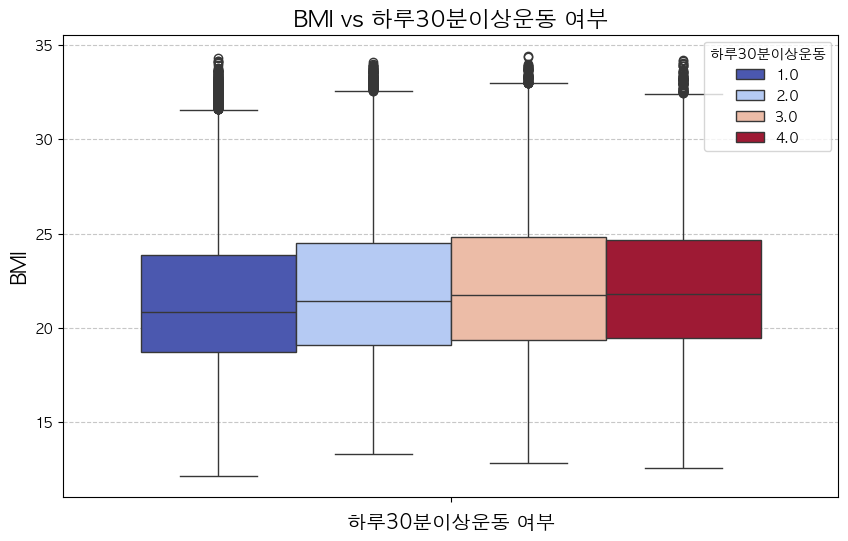

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, hue='하루30분이상운동', y='BMI', palette='coolwarm')
plt.title('BMI vs 하루30분이상운동 여부', fontsize=16)
plt.xlabel('하루30분이상운동 여부', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

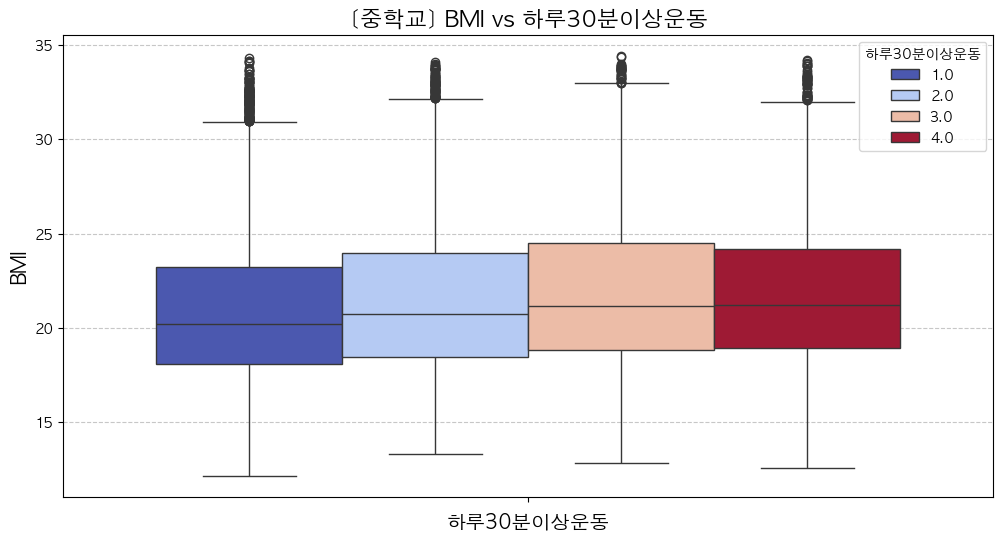

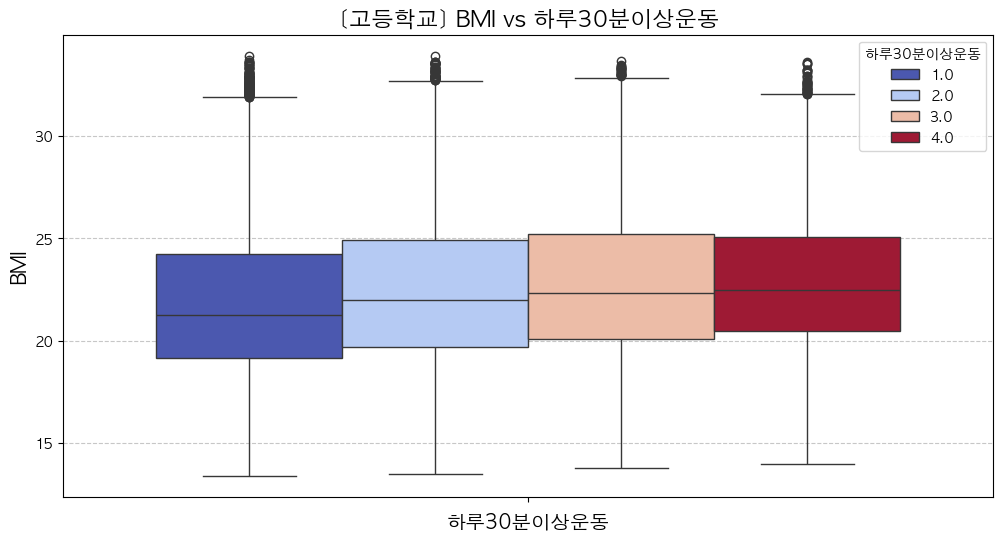

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 중학교 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=middle_school_data, hue='하루30분이상운동', y='BMI', palette='coolwarm')
plt.title('[중학교] BMI vs 하루30분이상운동', fontsize=16)
plt.xlabel('하루30분이상운동', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 고등학교 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_school_data, hue='하루30분이상운동', y='BMI', palette='coolwarm')
plt.title('[고등학교] BMI vs 하루30분이상운동', fontsize=16)
plt.xlabel('하루30분이상운동', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [38]:
# IQR 계산 및 이상치 확인
def find_outliers(data, column, group_column=None):
    outliers = []
    if group_column:  # 그룹별로 이상치 확인
        for group in data[group_column].unique():
            subset = data[data[group_column] == group]
            Q1 = subset[column].quantile(0.25)
            Q3 = subset[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            group_outliers = subset[(subset[column] < lower_bound) | (subset[column] > upper_bound)]
            outliers.append((group, group_outliers))
    else:  # 전체 데이터에서 이상치 확인
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# 그룹별 이상치 확인
outliers = find_outliers(cleaned_data, column='BMI', group_column='하루30분이상운동')

# 이상치 출력
for group, outlier_data in outliers:
    print(f"\nGroup: {group}")
    print(outlier_data[['하루30분이상운동', 'BMI', '몸무게', '키', '허리둘레']])


Group: 1.0
       하루30분이상운동    BMI    몸무게      키   허리둘레
91733        1.0  31.59   91.2  1.699    NaN
91738        1.0  31.60   97.0  1.752  102.0
91739        1.0  31.60  102.4  1.800   95.0
91741        1.0  31.60   92.3  1.709    NaN
91748        1.0  31.60   87.5  1.664    NaN
...          ...    ...    ...    ...    ...
92711        1.0  34.07   98.0  1.696    NaN
92714        1.0  34.11   97.3  1.689  106.0
92715        1.0  34.14  102.4  1.732    NaN
92717        1.0  34.18  101.6  1.724    NaN
92719        1.0  34.34   93.6  1.651    NaN

[270 rows x 5 columns]

Group: 4.0
       하루30분이상운동    BMI    몸무게      키   허리둘레
92274        4.0  32.46   94.8  1.709    NaN
92277        4.0  32.46   96.7  1.726    NaN
92295        4.0  32.50   95.6  1.715    NaN
92305        4.0  32.53  104.8  1.795  106.0
92307        4.0  32.53   81.2  1.580  102.0
...          ...    ...    ...    ...    ...
92707        4.0  34.00   90.1  1.628    NaN
92708        4.0  34.02  103.0  1.740    NaN
92710  

In [42]:
# 모든 데이터 출력 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.width', None)  # 출력 너비 제한 해제
pd.set_option('display.max_colwidth', None)  # 열 너비 제한 해제

# 이상치 출력
for group, outlier_data in outliers:
    print(f"\nGroup: {group}")
    if not outlier_data.empty:
        print(outlier_data[['하루30분이상운동', 'BMI', '몸무게', '키', '허리둘레']])
    else:
        print(f"No outliers found for group {group}.")



Group: 1.0
       하루30분이상운동    BMI    몸무게      키   허리둘레
91733        1.0  31.59   91.2  1.699    NaN
91738        1.0  31.60   97.0  1.752  102.0
91739        1.0  31.60  102.4  1.800   95.0
91741        1.0  31.60   92.3  1.709    NaN
91748        1.0  31.60   87.5  1.664    NaN
91749        1.0  31.60   99.0  1.770    NaN
91751        1.0  31.61   78.8  1.579    NaN
91753        1.0  31.61   78.9  1.580    NaN
91754        1.0  31.61   94.7  1.731   97.0
91756        1.0  31.62   90.1  1.688    NaN
91759        1.0  31.62   83.7  1.627   85.0
91768        1.0  31.63   88.0  1.668    NaN
91770        1.0  31.64   84.8  1.637    NaN
91775        1.0  31.64   80.3  1.593    NaN
91777        1.0  31.65   90.3  1.689    NaN
91779        1.0  31.65   79.0  1.580    NaN
91783        1.0  31.65   88.6  1.673   92.0
91784        1.0  31.65   86.8  1.656    NaN
91791        1.0  31.66   91.4  1.699    NaN
91794        1.0  31.67   83.0  1.619   82.0
91795        1.0  31.67   91.1  1.696   94.

In [44]:
# 각 그룹의 BMI 추출
bmi_group_1 = cleaned_data[cleaned_data['하루30분이상운동'] == 1]['BMI']
bmi_group_2 = cleaned_data[cleaned_data['하루30분이상운동'] == 2]['BMI']
bmi_group_3 = cleaned_data[cleaned_data['하루30분이상운동'] == 3]['BMI']
bmi_group_4 = cleaned_data[cleaned_data['하루30분이상운동'] == 4]['BMI']

In [46]:
from scipy.stats import shapiro

# 정규성 검정
print("\n[정규성 검정 결과]")
for i, group in enumerate([bmi_group_1, bmi_group_2, bmi_group_3, bmi_group_4], start=1):
    stat, p = shapiro(group)
    print(f"운동 그룹 {i}: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(f" -> 그룹 {i}는 정규성을 따릅니다.")
    else:
        print(f" -> 그룹 {i}는 정규성을 따르지 않습니다.")



[정규성 검정 결과]
운동 그룹 1: W-Statistic = 0.9583, p-value = 0.0000
 -> 그룹 1는 정규성을 따르지 않습니다.
운동 그룹 2: W-Statistic = 0.9671, p-value = 0.0000
 -> 그룹 2는 정규성을 따르지 않습니다.
운동 그룹 3: W-Statistic = 0.9731, p-value = 0.0000
 -> 그룹 3는 정규성을 따르지 않습니다.
운동 그룹 4: W-Statistic = 0.9696, p-value = 0.0000
 -> 그룹 4는 정규성을 따르지 않습니다.


/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18895.
  res = hypotest_fun_out(*samples, **kwds)
/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17341.
  res = hypotest_fun_out(*samples, **kwds)
/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9729.
  res = hypotest_fun_out(*samples, **kwds)
/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7073.
  res = hypotest_fun_out(*samples, **kwds)


## Shapiro-Wilk Test는 샘플 크기가 5000 이상일 때 p-value 계산이 정확하지 않을 수 있습니다.
### 현재 데이터의 샘플 크기가 그룹마다 5000을 초과했으므로, Shapiro-Wilk Test 대신 다른 방법을 사용해야 합니다.
## -> Kolmogorov-Smirnov Test 사용 

In [29]:
from scipy.stats import kstest

print("\n[정규성 검정 결과: Kolmogorov-Smirnov Test]")
for i, group in enumerate([bmi_group_1, bmi_group_2, bmi_group_3, bmi_group_4], start=1):
    stat, p = kstest(group, 'norm', args=(group.mean(), group.std()))
    print(f"운동 그룹 {i}: KS-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(f" -> 그룹 {i}는 정규성을 따릅니다.")
    else:
        print(f" -> 그룹 {i}는 정규성을 따르지 않습니다.")



[정규성 검정 결과: Kolmogorov-Smirnov Test]
운동 그룹 1: KS-Statistic = 0.0773, p-value = 0.0000
 -> 그룹 1는 정규성을 따르지 않습니다.
운동 그룹 2: KS-Statistic = 0.0657, p-value = 0.0000
 -> 그룹 2는 정규성을 따르지 않습니다.
운동 그룹 3: KS-Statistic = 0.0604, p-value = 0.0000
 -> 그룹 3는 정규성을 따르지 않습니다.
운동 그룹 4: KS-Statistic = 0.0591, p-value = 0.0000
 -> 그룹 4는 정규성을 따르지 않습니다.


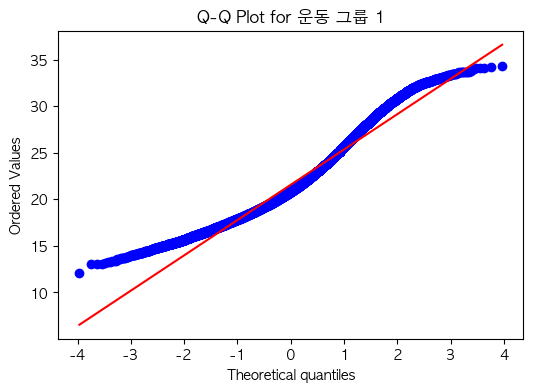

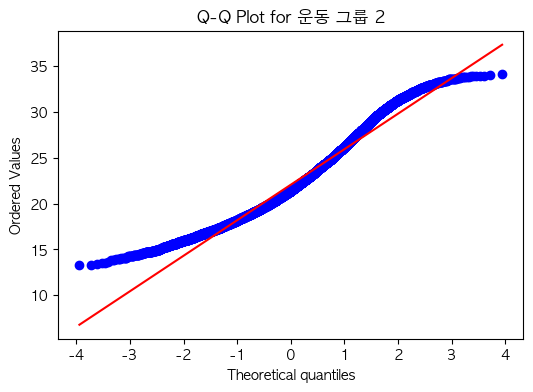

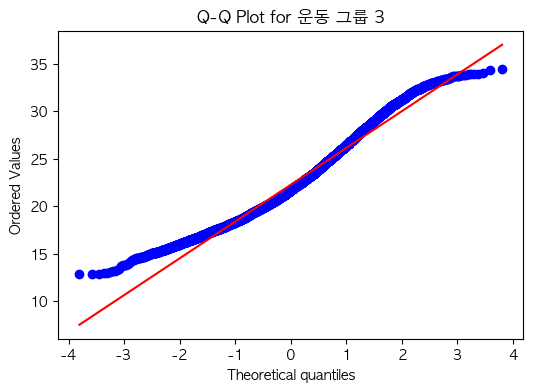

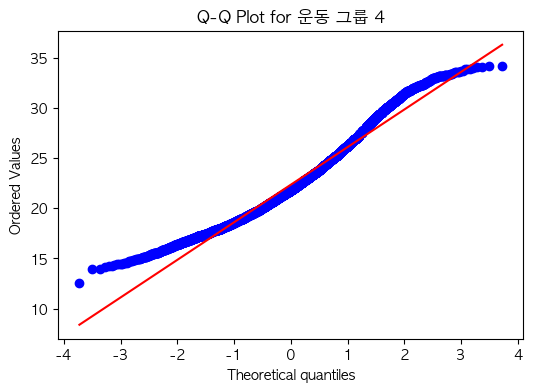

In [31]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q Plot
for i, group in enumerate([bmi_group_1, bmi_group_2, bmi_group_3, bmi_group_4], start=1):
    plt.figure(figsize=(6, 4))
    stats.probplot(group, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for 운동 그룹 {i}")
    plt.show()


In [49]:
from scipy.stats import levene

# 등분산성 검정
stat, p = levene(bmi_group_1, bmi_group_2, bmi_group_3, bmi_group_4)
print("\n[등분산성 검정 결과]")
print(f"Levene’s Test: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print(" -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).")
else:
    print(" -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).")



[등분산성 검정 결과]
Levene’s Test: W-Statistic = 8.4303, p-value = 0.0000
 -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).


In [51]:
from scipy.stats import kruskal

# Kruskal-Wallis Test 수행
stat, p = kruskal(bmi_group_1, bmi_group_2, bmi_group_3, bmi_group_4)

# 결과 출력
print("\n[Kruskal-Wallis Test 결과]")
print(f"H-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print(" -> 운동 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.")
else:
    print(" -> 운동 그룹 간 BMI 중앙값에 유의미한 차이가 없습니다.")



[Kruskal-Wallis Test 결과]
H-Statistic = 398.9864, p-value = 0.0000
 -> 운동 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.


In [53]:
from scikit_posthocs import posthoc_dunn

# Dunn’s Test 사후 검정
dunn_results = posthoc_dunn([bmi_group_1, bmi_group_2, bmi_group_3, bmi_group_4], p_adjust='bonferroni')

# 결과 출력
print("\n[Dunn’s Test 결과]")
print(dunn_results)



[Dunn’s Test 결과]
              1             2             3             4
1  1.000000e+00  2.094589e-35  3.015525e-55  2.557488e-56
2  2.094589e-35  1.000000e+00  1.960926e-06  1.121332e-09
3  3.015525e-55  1.960926e-06  1.000000e+00  6.406911e-01
4  2.557488e-56  1.121332e-09  6.406911e-01  1.000000e+00


# 회귀 분석 
## 데이터 준비
독립 변수(X): 하루30분이상운동 (1, 2, 3, 4)
종속 변수(Y): BMI

In [69]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [100]:
# 필요한 열만 선택
regression_data = cleaned_data[['하루30분이상운동', 'BMI', '학년', '학교급']]

# 결측치 제거
regression_data = regression_data.dropna()

# 확인
print(f"Regression data size: {regression_data.shape}")
print(regression_data.head())


Regression data size: (53038, 4)
     하루30분이상운동    BMI  학년 학교급
28         1.0  12.14   1   중
103        4.0  12.56   1   중
202        3.0  12.84   2   중
235        3.0  12.90   1   중
241        3.0  12.91   1   중


                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     299.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           8.27e-67
Time:                        02:40:03   Log-Likelihood:            -1.4733e+05
No. Observations:               53038   AIC:                         2.947e+05
Df Residuals:                   53036   BIC:                         2.947e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3637      0.038    558.761      0.0

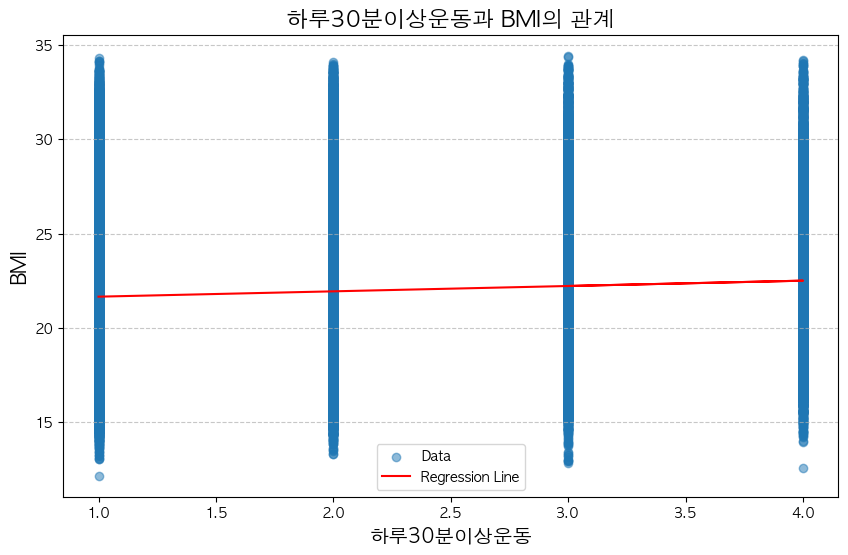

In [73]:
# 독립 변수와 종속 변수 정의
X = sm.add_constant(regression_data['하루30분이상운동'])  # 상수항 추가
y = regression_data['BMI']

# 회귀 모델 생성
model = sm.OLS(y, X).fit()

# 결과 요약
print(model.summary())

# 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(regression_data['하루30분이상운동'], regression_data['BMI'], alpha=0.5, label='Data')
plt.plot(regression_data['하루30분이상운동'], model.predict(X), color='red', label='Regression Line')
plt.title('하루30분이상운동과 BMI의 관계', fontsize=16)
plt.xlabel('하루30분이상운동', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


독립 변수: 하루30분이상운동
종속 변수: BMI
결과 요약:
𝑅
2
R 
2
 : 0.006
운동 빈도는 BMI 변동의 0.6%만 설명함. 설명력이 매우 낮음.
회귀 계수:
하루30분이상운동이 1 증가할 때, BMI는 0.2832 증가.
유의성:
𝑝
<
0.0001
p<0.0001, 매우 유의미.
시각화:
데이터의 분산이 매우 크며, 선형 회귀선이 데이터 변동을 충분히 설명하지 못함.

In [102]:
# 중학교 데이터 필터링
middle_school_data = regression_data[regression_data['학교급'] == '중']

# 고등학교 데이터 필터링
high_school_data = regression_data[regression_data['학교급'] == '고']

# 중학교 데이터 확인
print(f"중학교 데이터 크기: {middle_school_data.shape}")
print(middle_school_data.head())

# 고등학교 데이터 확인
print(f"고등학교 데이터 크기: {high_school_data.shape}")
print(high_school_data.head())


중학교 데이터 크기: (25609, 4)
     하루30분이상운동    BMI  학년 학교급
28         1.0  12.14   1   중
103        4.0  12.56   1   중
202        3.0  12.84   2   중
235        3.0  12.90   1   중
241        3.0  12.91   1   중
고등학교 데이터 크기: (27420, 4)
      하루30분이상운동    BMI  학년 학교급
583         1.0  13.39   1   고
657         2.0  13.46   1   고
857         1.0  13.62   1   고
971         1.0  13.69   1   고
1040        1.0  13.73   2   고



[중학교 회귀 분석 결과]
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.47e-64
Time:                        02:48:25   Log-Likelihood:                -71418.
No. Observations:               25609   AIC:                         1.428e+05
Df Residuals:                   25606   BIC:                         1.429e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1182      0.085    

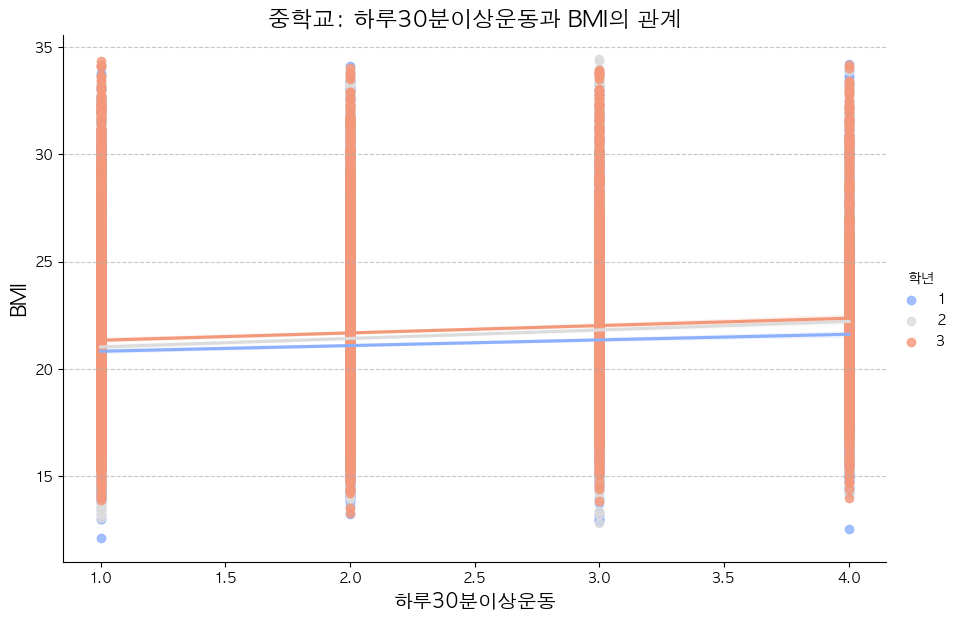

In [104]:
# 중학교 데이터로 회귀 분석
X_middle = sm.add_constant(middle_school_data[['하루30분이상운동', '학년']])
y_middle = middle_school_data['BMI']

middle_model = sm.OLS(y_middle, X_middle).fit()

# 결과 요약
print("\n[중학교 회귀 분석 결과]")
print(middle_model.summary())

# 중학교 시각화
sns.lmplot(
    x='하루30분이상운동', 
    y='BMI', 
    hue='학년', 
    data=middle_school_data, 
    palette='coolwarm', 
    height=6, 
    aspect=1.5
)
plt.title('중학교: 하루30분이상운동과 BMI의 관계', fontsize=16)
plt.xlabel('하루30분이상운동', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 중학교 데이터 회귀 분석
독립 변수: 하루30분이상운동, 학년
종속 변수: BMI
결과 요약:
𝑅
2
R 
2
 : 0.009
운동 빈도와 학년은 BMI 변동의 0.9%만 설명함.
회귀 계수:
하루30분이상운동: 1 증가할 때 BMI는 0.2878 증가.
학년: 1 증가할 때 BMI는 0.2607 증가.
유의성:
𝑝
<
0.0001
p<0.0001, 두 변수 모두 유의미.
시각화:
학년별로 운동 빈도와 BMI 간의 관계를 시각화했으나, 분산이 커서 명확한 패턴 확인은 어려움.



[고등학교 회귀 분석 결과]
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.62e-77
Time:                        02:48:32   Log-Likelihood:                -75302.
No. Observations:               27420   AIC:                         1.506e+05
Df Residuals:                   27417   BIC:                         1.506e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1836      0.074   

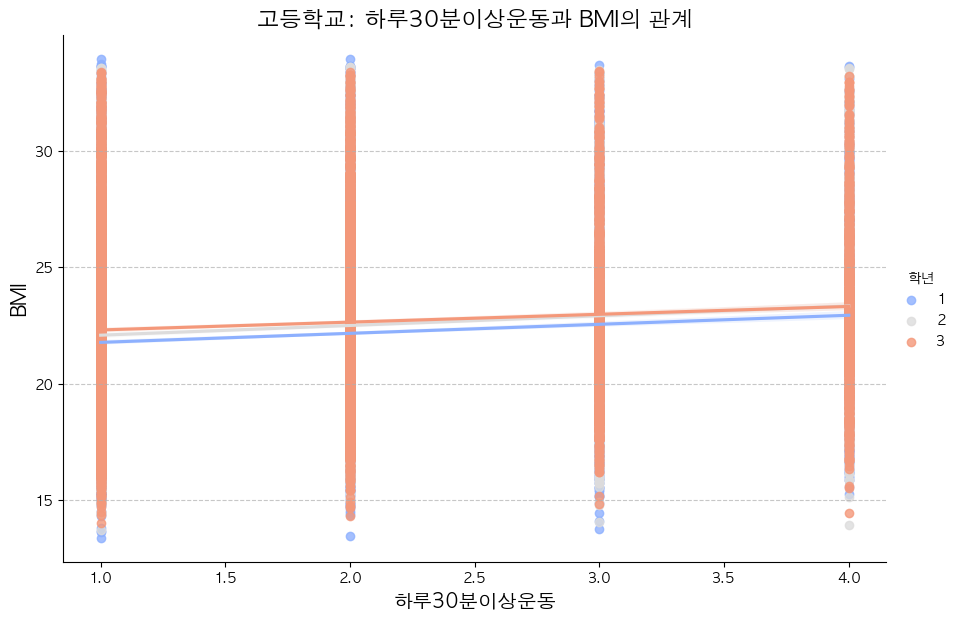

In [106]:
# 고등학교 데이터로 회귀 분석
X_high = sm.add_constant(high_school_data[['하루30분이상운동', '학년']])
y_high = high_school_data['BMI']

high_model = sm.OLS(y_high, X_high).fit()

# 결과 요약
print("\n[고등학교 회귀 분석 결과]")
print(high_model.summary())

# 고등학교 시각화
sns.lmplot(
    x='하루30분이상운동', 
    y='BMI', 
    hue='학년', 
    data=high_school_data, 
    palette='coolwarm', 
    height=6, 
    aspect=1.5
)
plt.title('고등학교: 하루30분이상운동과 BMI의 관계', fontsize=16)
plt.xlabel('하루30분이상운동', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


고등학교 데이터 회귀 분석
독립 변수: 하루30분이상운동, 학년
종속 변수: BMI
결과 요약:
𝑅
2
R 
2
 : 고등학교 데이터도 설명력이 매우 낮을 것으로 예상됨.
회귀 계수와 유의성:
하루30분이상운동과 학년 모두 BMI에 유의미한 영향을 미침.
시각화:
중학교와 유사하게 분산이 큰 데이터 패턴 확인.

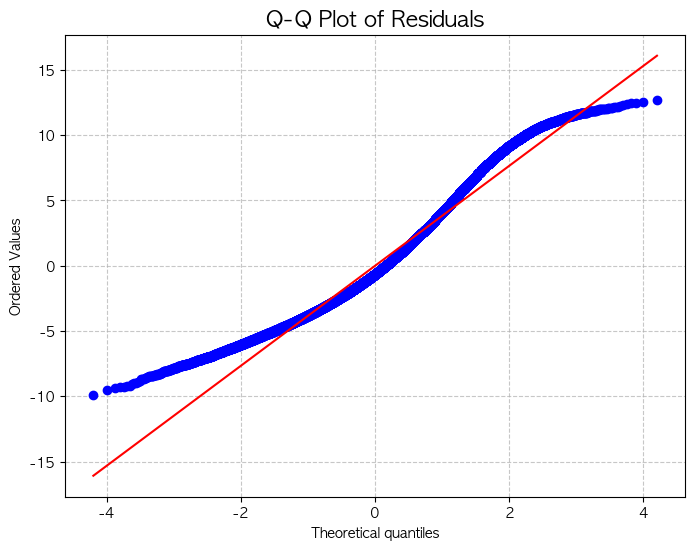

In [120]:
# 로그 변환 적용
regression_data['log_BMI'] = np.log(regression_data['BMI'])

# 변환된 데이터로 회귀 분석
X_trans = sm.add_constant(regression_data[['하루30분이상운동', '학년']])
y_trans = regression_data['log_BMI']

trans_model = sm.OLS(y_trans, X_trans).fit()
print(trans_model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_BMI   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     262.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          4.22e-114
Time:                        02:53:05   Log-Likelihood:                 17944.
No. Observations:               53038   AIC:                        -3.588e+04
Df Residuals:                   53035   BIC:                        -3.585e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0209      0.002   1214.195      0.0

로그 변환 회귀 분석
결과 요약:
로그 변환된 BMI에 대해 회귀 분석을 수행한 결과:
𝑅
2
R 
2
 : 0.010
여전히 설명력은 낮음.
회귀 계수:
하루30분이상운동: 1 증가할 때 로그 BMI는 0.0135 증가.
학년: 1 증가할 때 로그 BMI는 0.0125 증가.
유의성:
두 변수 모두 매우 유의미(
𝑝
<
0.0001
p<0.0001).
Q-Q Plot 확인:
잔차가 정규성을 따르지 않는 경향이 있음.

### 추가적으로 BMI가 엄청 큰 집단을 제외하면 결과가 유의미할까 ?

In [125]:
# IQR 계산 및 이상치 제거 함수
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # 이상치가 아닌 데이터 필터링
    cleaned_data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data_no_outliers

# 이상치 제거
cleaned_data_no_outliers = remove_outliers(cleaned_data, column='BMI')
print(f"이상치 제거 후 데이터 크기: {cleaned_data_no_outliers.shape}")


이상치 제거 후 데이터 크기: (52577, 114)


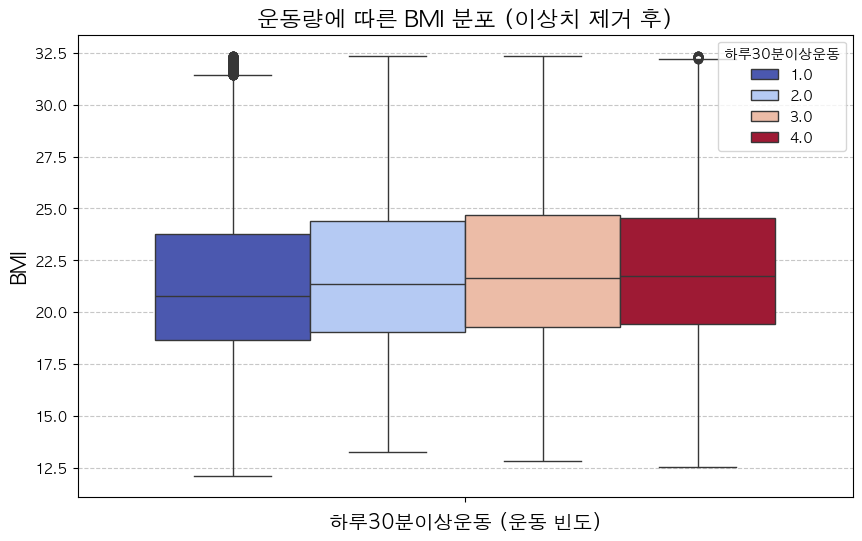


운동량 그룹별 BMI 통계 (이상치 제거 후):
             count       mean       std    min    25%     50%    75%    max
하루30분이상운동                                                                  
1.0        18760.0  21.481887  3.760528  12.14  18.68  20.790  23.77  32.35
2.0        17182.0  21.947294  3.803230  13.27  19.06  21.360  24.38  32.35
3.0         9629.0  22.164178  3.786125  12.84  19.32  21.670  24.69  32.34
4.0         7006.0  22.239132  3.668795  12.56  19.45  21.755  24.54  32.35


In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# 박스플롯: 운동량에 따른 BMI 분포
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data_no_outliers, hue='하루30분이상운동', y='BMI', palette='coolwarm')
plt.title('운동량에 따른 BMI 분포 (이상치 제거 후)', fontsize=16)
plt.xlabel('하루30분이상운동 (운동 빈도)', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 운동량 그룹별 BMI 통계 확인
grouped_stats = cleaned_data_no_outliers.groupby('하루30분이상운동')['BMI'].describe()
print("\n운동량 그룹별 BMI 통계 (이상치 제거 후):")
print(grouped_stats)


In [157]:
from scipy.stats import kstest

print("\n[정규성 검정 결과: Kolmogorov-Smirnov Test (이상치 제거 후)]")
for group in cleaned_data_no_outliers['하루30분이상운동'].unique():
    group_data = cleaned_data_no_outliers[cleaned_data_no_outliers['하루30분이상운동'] == group]['BMI']
    # Kolmogorov-Smirnov Test
    stat, p = kstest(group_data, 'norm', args=(group_data.mean(), group_data.std()))
    print(f"운동량 그룹 {group}: KS-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(f" -> 그룹 {group}는 정규성을 따릅니다.")
    else:
        print(f" -> 그룹 {group}는 정규성을 따르지 않습니다.")



[정규성 검정 결과: Kolmogorov-Smirnov Test (이상치 제거 후)]
운동량 그룹 1.0: KS-Statistic = 0.0740, p-value = 0.0000
 -> 그룹 1.0는 정규성을 따르지 않습니다.
운동량 그룹 4.0: KS-Statistic = 0.0548, p-value = 0.0000
 -> 그룹 4.0는 정규성을 따르지 않습니다.
운동량 그룹 3.0: KS-Statistic = 0.0576, p-value = 0.0000
 -> 그룹 3.0는 정규성을 따르지 않습니다.
운동량 그룹 2.0: KS-Statistic = 0.0622, p-value = 0.0000
 -> 그룹 2.0는 정규성을 따르지 않습니다.


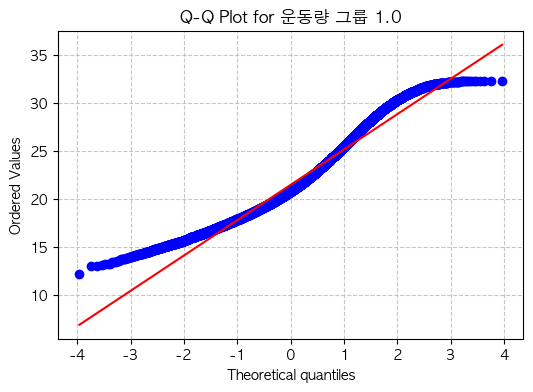

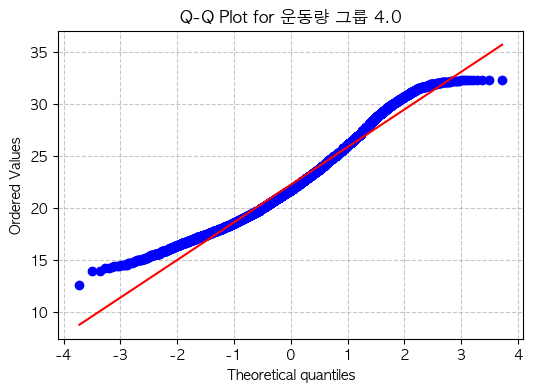

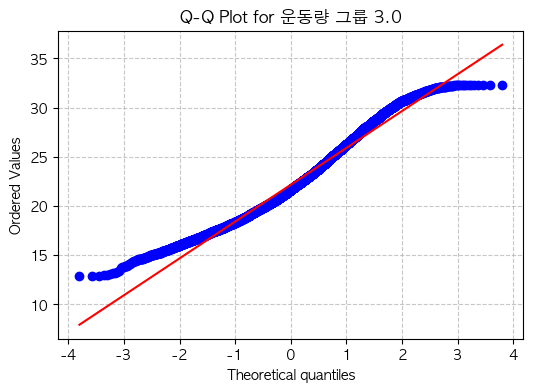

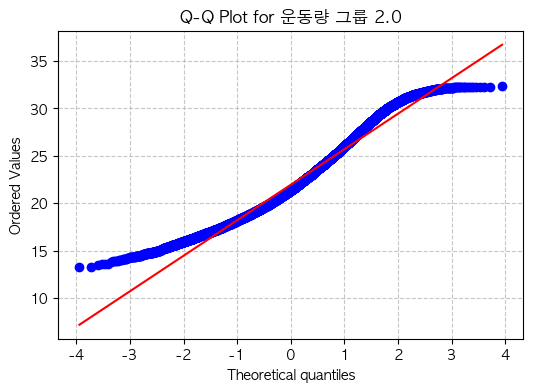

In [159]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q Plot
for group in cleaned_data_no_outliers['하루30분이상운동'].unique():
    group_data = cleaned_data_no_outliers[cleaned_data_no_outliers['하루30분이상운동'] == group]['BMI']
    plt.figure(figsize=(6, 4))
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for 운동량 그룹 {group}")
    plt.grid(alpha=0.7, linestyle='--')
    plt.show()


In [155]:
from scipy.stats import levene

grouped_bmi_no_outliers = [
    cleaned_data_no_outliers[cleaned_data_no_outliers['하루30분이상운동'] == group]['BMI']
    for group in cleaned_data_no_outliers['하루30분이상운동'].unique()
]

# 등분산성 검정
stat, p = levene(*grouped_bmi_no_outliers)
print("\n[등분산성 검정 결과 (이상치 제거 후)]")
print(f"Levene’s Test: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print(" -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).")
else:
    print(" -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).")



[등분산성 검정 결과 (이상치 제거 후)]
Levene’s Test: W-Statistic = 7.6407, p-value = 0.0000
 -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).


In [149]:
from scipy.stats import kruskal

# Kruskal-Wallis Test 수행
h_stat, p_value = kruskal(*grouped_bmi_no_outliers)
print("\n[Kruskal-Wallis Test 결과 (이상치 제거 후)]")
print(f"H-Statistic: {h_stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print(" -> 운동량 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.")
else:
    print(" -> 운동량 그룹 간 BMI 중앙값에 유의미한 차이가 없습니다.")



[Kruskal-Wallis Test 결과 (이상치 제거 후)]
H-Statistic: 390.5218, p-value: 0.0000
 -> 운동량 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.
